In [95]:
include("../src/JuliaMBD.jl")

Main.JuliaMBD

In [96]:
using DifferentialEquations
using Plots
import .JuliaMBD
import LookupTable

In [97]:
## test

function test(;breaks = :breaks, y = :y)
    b = JuliaMBD.SubSystemBlock(:test)

    # JuliaMBD.addparameter!(b, :breaks, breaks)
    # JuliaMBD.addparameter!(b, :y, y)

    one = JuliaMBD.OneDLookupTable(breaks = 0:1:100, y = sin.(0:1:100))
    JuliaMBD.addscope!(b, :table, one.env[:out])

    # pulse = JuliaMBD.PulseGenerator(amplitude=10, period=1, pulsewidth=10, phasedelay=10)
    # JuliaMBD.LineSignal(b.timeport, pulse.env[:time])
    # JuliaMBD.add!(b, pulse)
    # JuliaMBD.addscope!(b, :x, pulse.env[:out])
    # JuliaMBD.LineSignal(pulse.env[:out], one.env[:in])

    ramp = JuliaMBD.Ramp(slope = 1.0)
    JuliaMBD.LineSignal(b.timeport, ramp.env[:time])
    JuliaMBD.add!(b, ramp)
    JuliaMBD.addscope!(b, :x, ramp.env[:out])
    JuliaMBD.LineSignal(ramp.env[:out], one.env[:in])

    b
end

test (generic function with 1 method)

In [98]:
b = test()

"Block(test)"

In [99]:
eval(JuliaMBD.expr_sfunc(b))
eval(JuliaMBD.expr_ofunc(b))
eval(JuliaMBD.expr_ifunc(b))
eval(JuliaMBD.expr_pfunc(b))
m = JuliaMBD.ODEModel(
    b,
    eval(JuliaMBD.expr_odemodel_pfunc(b)),
    eval(JuliaMBD.expr_odemodel_ifunc(b)),
    eval(JuliaMBD.expr_odemodel_sfunc(b)),
    eval(JuliaMBD.expr_odemodel_ofunc(b))
);

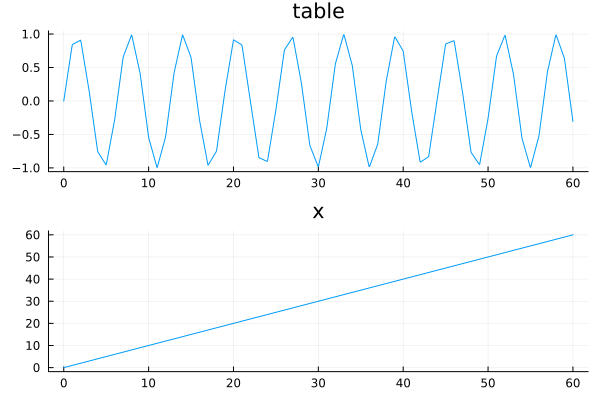

In [101]:
result = JuliaMBD.simulate(m, (0.0, 60.0))
plot(result)